# AIML Cohort4 Feature Engineering Project1 Group3

Members: Gursimran Kaur, Shane Fernandes and Sudheendran TL

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import xlrd
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Part (A)  - Collect / Extract Data

In [2]:
data = pd.read_excel('HR-Records_Final.xlsx')

In [3]:
workbook = xlrd.open_workbook('HR-Records_Final.xlsx') 

In [4]:
# there are 3 different sheets and we will read 3 sheets individually and will then merge it.
application = pd.read_excel(workbook, sheet_name=1)
candidate = pd.read_excel(workbook, sheet_name=3)
interview = pd.read_excel(workbook, sheet_name=5)

In [5]:
data_list = [application, candidate, interview]

In [6]:
# Merge the interview and application datasets.
interviewAndApplication = pd.merge(interview, application, on = ["Candidate ID"])

In [7]:
dataset = pd.merge(interviewAndApplication, candidate, on = ["Candidate ID"])

In [8]:
dataset.to_excel("FE_Project1_Group3_Aggregated_datafile.xlsx", index=False)

In [9]:
dataset.shape

(200, 37)

In [10]:
dataset.head()

,Candidate ID,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration,Date of Application,...,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Gender,Candidate source,DOB,Location,Number of precious jobs
0,C1,2020-05-29,4,2020-06-03,2020-06-12,General,Online,40,25,2019-08-28,...,8,7.2,2012,1500000,0.290383,M,Direct,1991-11-06,Kolkata,2
1,C2,2020-05-31,2,2020-06-05,2020-06-08,Managerial,FaceToFace,40,40,2019-11-28,...,15,13.5,2005,3200000,0.432342,M,Agency,1984-02-22,Pune,4
2,C3,2020-05-15,3,2020-05-20,2020-05-26,Technical,Online,45,60,2019-08-11,...,4,3.6,2016,800000,0.371345,M,Direct,1995-03-27,Chennai,1
3,C4,2020-05-10,1,2020-05-15,2020-05-15,Technical,Written,40,40,2019-08-18,...,20,18.0,2000,4400000,0.373813,M,Direct,1979-06-14,Hyderabad,6
4,C5,2020-01-11,4,2020-01-16,2020-01-25,Technical,Online,15,25,2019-09-06,...,17,15.3,2003,3600000,0.389619,M,Employee referral,1982-11-26,Hyderabad,5


In [11]:
dataset.tail()

,Candidate ID,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration,Date of Application,...,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Gender,Candidate source,DOB,Location,Number of precious jobs
195,C196,2020-05-25,4,2020-05-30,2020-06-08,Technical,FaceToFace,15,20,2019-12-06,...,17,15.3,2003,3900000,0.458273,F,Employee referral,1979-02-17,Bangaluru,5
196,C197,2020-06-13,3,2020-06-18,2020-06-24,General,Written,60,60,2019-11-10,...,16,14.4,2004,3200000,0.286976,M,Agency,1982-05-27,Kolkata,5
197,C198,2020-01-17,4,2020-01-22,2020-01-31,Technical,FaceToFace,30,15,2019-11-19,...,14,12.6,2006,2600000,0.254088,F,Direct,1985-09-21,Kolkata,4
198,C199,2020-04-18,4,2020-04-23,2020-05-02,Managerial,FaceToFace,25,25,2019-09-12,...,13,11.7,2007,3000000,0.530020,F,Employee referral,1986-06-02,Kolkata,4
199,C200,2020-01-24,1,2020-01-29,2020-01-29,General,Online,45,45,2019-10-29,...,4,3.6,2016,800000,0.336813,M,Agency,1994-03-17,Mumbai,1


# Part (B) AND (C) PRE-PROCESS DATA AND EDA

In [12]:
# the dataset is now merged into a single file
# with 200 rows and 37 columns 
# the datasets provided are merged on the "Candidate ID"
# let's start with the pre-processing of the data.
# we can see the statistics of the data using the Describe() function.
dataset.describe()

,Interview rounds,First interview duration,Last interaction duration,Offered Salary,Percentage hike offered (CTC),Joining bonus amount,Notice period,Current CTC,Current gross salary,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Number of precious jobs
count,200.000000,200.000000,200.0000,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000
mean,2.485000,35.700000,35.1250,2.346565e+06,0.270672,92967.280031,31.275000,1.859346e+06,1.652752e+06,12.280000,11.052000,2007.720000,2.532500e+06,0.370672,3.575000
std,1.125214,14.397794,14.7631,1.095181e+06,0.087131,43718.606470,22.038098,8.743721e+05,7.772197e+05,5.242041,4.717837,5.242041,1.181556e+06,0.087131,1.728965
min,1.000000,15.000000,15.0000,4.609491e+05,0.109940,18048.881250,0.000000,3.609776e+05,3.208690e+05,3.000000,2.700000,2000.000000,5.000000e+05,0.209940,1.000000
25%,1.000000,25.000000,25.0000,1.396196e+06,0.194058,52955.339063,15.000000,1.059107e+06,9.414282e+05,7.750000,6.975000,2003.000000,1.500000e+06,0.294058,2.000000
50%,3.000000,40.000000,30.0000,2.414243e+06,0.275515,96949.490625,30.000000,1.938990e+06,1.723546e+06,12.000000,10.800000,2008.000000,2.600000e+06,0.375515,4.000000
75%,3.000000,45.000000,45.0000,3.317921e+06,0.340090,133375.598438,45.000000,2.667512e+06,2.371122e+06,17.000000,15.300000,2012.250000,3.600000e+06,0.440090,5.000000
max,4.000000,60.000000,60.0000,4.568679e+06,0.491772,167622.243750,60.000000,3.352445e+06,2.979951e+06,20.000000,18.000000,2017.000000,4.900000e+06,0.591772,6.000000


In [13]:
# let's now have a look at the columns and their data types.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Candidate ID                     200 non-null    object        
 1   Written Test Date                200 non-null    datetime64[ns]
 2   Interview rounds                 200 non-null    int64         
 3   Date of first Interview          200 non-null    datetime64[ns]
 4   Date of last Interview           200 non-null    datetime64[ns]
 5   Interview types                  200 non-null    object        
 6   Interview Types2                 200 non-null    object        
 7   First interview duration         200 non-null    int64         
 8   Last interaction duration        200 non-null    int64         
 9   Date of Application              200 non-null    datetime64[ns]
 10  Date of Interview                200 non-null    datetime64[ns

In [14]:
# let's now start the preprocessing of the data by checking if there is any of the missing values are present in the dataset.
dataset.isnull().sum()

Candidate ID                       0
Written Test Date                  0
Interview rounds                   0
Date of first Interview            0
Date of last Interview             0
Interview types                    0
Interview Types2                   0
First interview duration           0
Last interaction duration          0
Date of Application                0
Date of Interview                  0
Date of Job Offer                  0
Date of Offer extension            0
Date of Joining                    0
Offered band                       0
Offered Salary                     0
Percentage hike offered (CTC)      0
Joining bonus amount               0
LOB                                0
Joining location                   0
Candidate relocation status        0
Acceptance status                  0
Notice period                      0
Current CTC                        0
Current gross salary               0
Current organization               0
Highest Educational Degree         0
T

In [15]:
# As we can see the list of the columns above ; all the columns seem perfect without any missing value present in it.
# the numberical value 0 written in the front of the columns is showing the number of the missing values present 
# in that column. So, No missing values are there.
# let's now check if the dataset contains the duplicate data.
# the duplicate data can be checked by the following.
dataset.duplicated().sum()

0

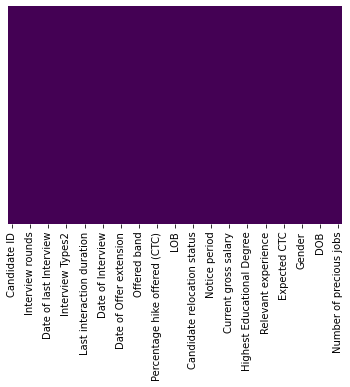

In [16]:
# the 0 value above shows that there are no duplicate records in our dataset.
# we can also use the seaborn libraray to check if there are duplicates present in our dataset.
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [17]:
# The heatmap does not show any white areas and hence, there are no duplicates present in our dataset.
# let's now convert the categorical data present in our dataset into the numerical values.

In [18]:
label_encoder = LabelEncoder()

In [19]:
# let's convert every column that has the object datatype into a numerical value
dataset["Candidate ID"] = label_encoder.fit_transform(dataset["Candidate ID"])
dataset["Interview types"] = label_encoder.fit_transform(dataset["Interview types"])
dataset["Interview Types2"] = label_encoder.fit_transform(dataset["Interview Types2"])
dataset["Offered band"] = label_encoder.fit_transform(dataset["Offered band"])
dataset["LOB"] = label_encoder.fit_transform(dataset["LOB"])
dataset["Joining location"] = label_encoder.fit_transform(dataset["Joining location"])
dataset["Candidate relocation status"] = label_encoder.fit_transform(dataset["Candidate relocation status"])
dataset["Acceptance status"] = label_encoder.fit_transform(dataset["Acceptance status"])
dataset["Current organization"] = label_encoder.fit_transform(dataset["Current organization"])
dataset["Highest Educational Degree"] = label_encoder.fit_transform(dataset["Highest Educational Degree"])
dataset["Gender"] = label_encoder.fit_transform(dataset["Gender"])
dataset["Candidate source"] = label_encoder.fit_transform(dataset["Candidate source"])
dataset["Location"] = label_encoder.fit_transform(dataset["Location"])

In [20]:
dataset.head()

,Candidate ID,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration,Date of Application,...,Total experience,Relevant experience,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Gender,Candidate source,DOB,Location,Number of precious jobs
0,0,2020-05-29,4,2020-06-03,2020-06-12,0,1,40,25,2019-08-28,...,8,7.2,2012,1500000,0.290383,1,1,1991-11-06,5,2
1,111,2020-05-31,2,2020-06-05,2020-06-08,1,0,40,40,2019-11-28,...,15,13.5,2005,3200000,0.432342,1,0,1984-02-22,9,4
2,123,2020-05-15,3,2020-05-20,2020-05-26,2,1,45,60,2019-08-11,...,4,3.6,2016,800000,0.371345,1,1,1995-03-27,1,1
3,134,2020-05-10,1,2020-05-15,2020-05-15,2,2,40,40,2019-08-18,...,20,18.0,2000,4400000,0.373813,1,1,1979-06-14,4,6
4,145,2020-01-11,4,2020-01-16,2020-01-25,2,1,15,25,2019-09-06,...,17,15.3,2003,3600000,0.389619,1,2,1982-11-26,4,5


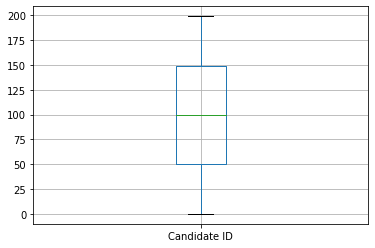

In [21]:
# Now, we can see that columns that we have are converted into the numerical values
# there are no categorical values present in our dataset.
# Hence, the label encoder converted the categorical values to the numerical values.
# let's move ahead to next step of pre-processing and check if there are outliers present in our dataset.
# let's check one by one if outliers are present in any column.
dataset.boxplot(column = ["Candidate ID"])

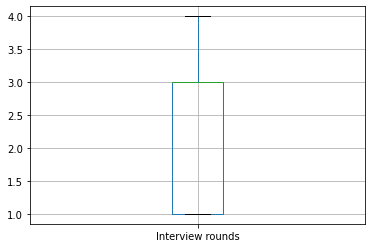

In [22]:
# no outliers in candidate ID
# let's check the column - Written Test Date.
dataset.boxplot(column = ["Interview rounds"])

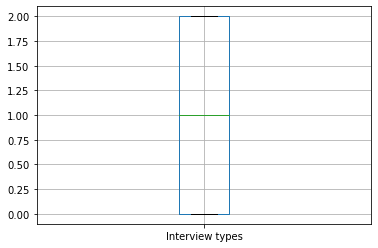

In [23]:
dataset.boxplot(column = ["Interview types"])

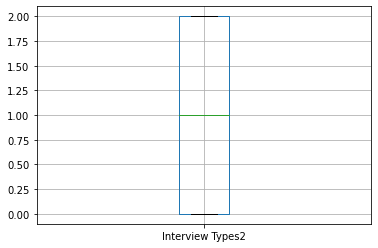

In [24]:
dataset.boxplot(column = ["Interview Types2"])

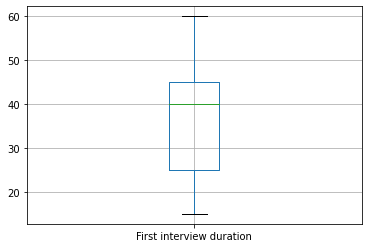

In [25]:
dataset.boxplot(column = ["First interview duration"])

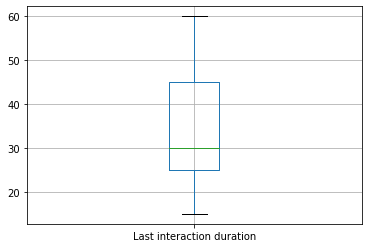

In [26]:
dataset.boxplot(column = ["Last interaction duration"])

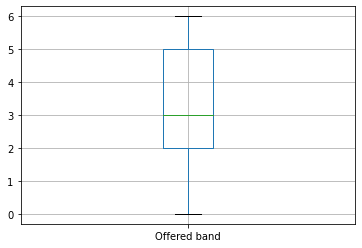

In [27]:
dataset.boxplot(column = ["Offered band"])

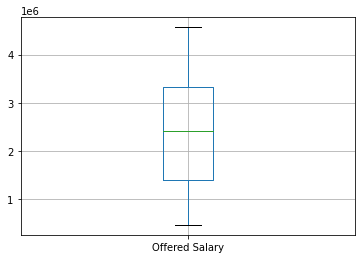

In [28]:
dataset.boxplot(column = ["Offered Salary"])

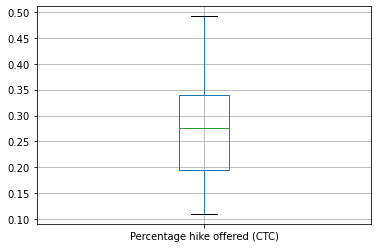

In [29]:
dataset.boxplot(column = ["Percentage hike offered (CTC)"])

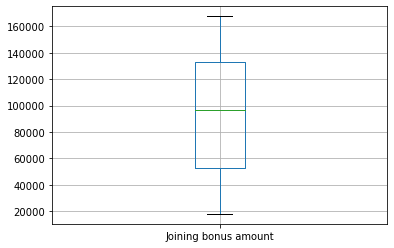

In [30]:
dataset.boxplot(column = ["Joining bonus amount"])

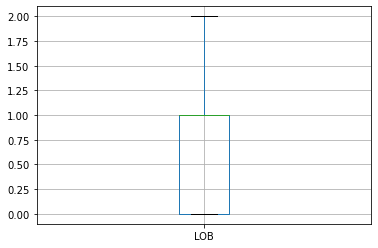

In [31]:
dataset.boxplot(column = ["LOB"])

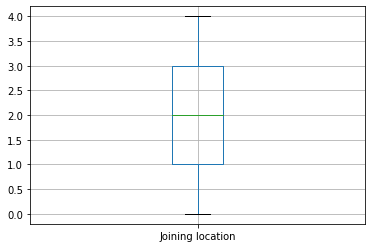

In [32]:
dataset.boxplot(column = ["Joining location"])

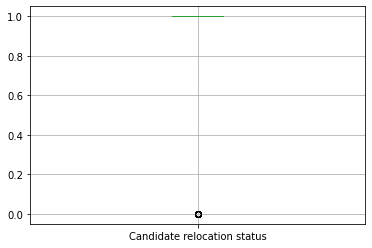

In [33]:
dataset.boxplot(column = ["Candidate relocation status"])

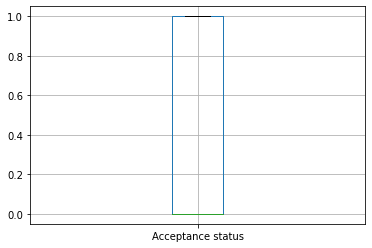

In [34]:
dataset.boxplot(column = ["Acceptance status"])

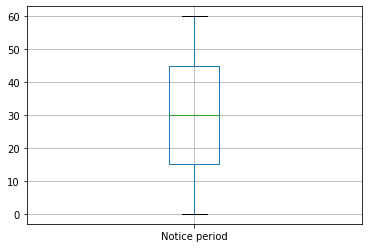

In [35]:
dataset.boxplot(column = ["Notice period"])

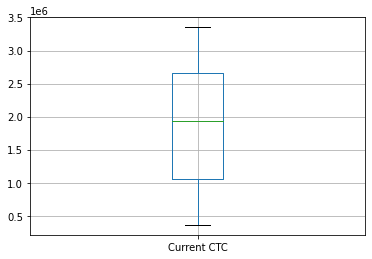

In [36]:
dataset.boxplot(column = ["Current CTC"])

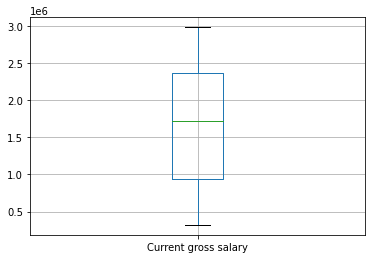

In [37]:
dataset.boxplot(column = ["Current gross salary"])

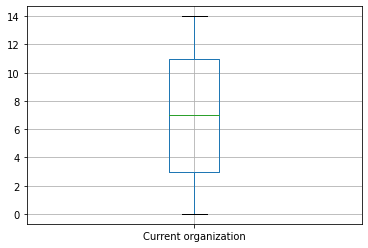

In [38]:
dataset.boxplot(column = ["Current organization"])

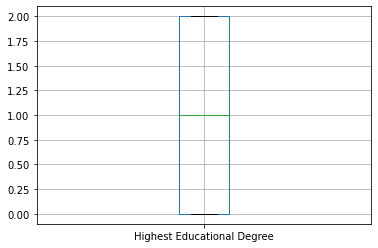

In [39]:
dataset.boxplot(column = ["Highest Educational Degree"])

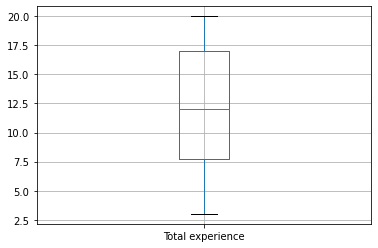

In [40]:
dataset.boxplot(column = ["Total experience"])

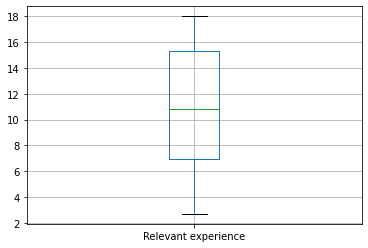

In [41]:
dataset.boxplot(column = ["Relevant experience"])

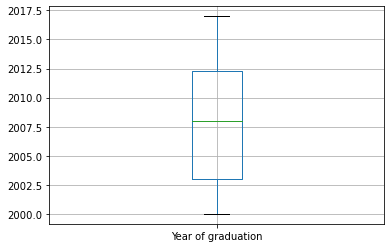

In [42]:
dataset.boxplot(column = ["Year of graduation"])

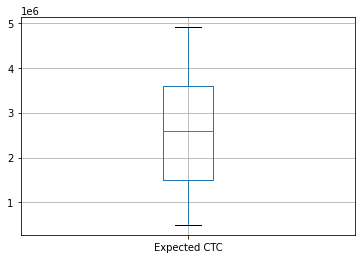

In [43]:
dataset.boxplot(column = ["Expected CTC"])

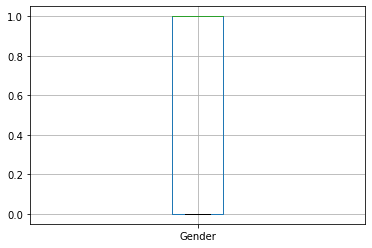

In [44]:
dataset.boxplot(column = ["Gender"])

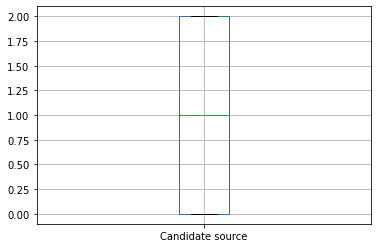

In [45]:
dataset.boxplot(column = ["Candidate source"])

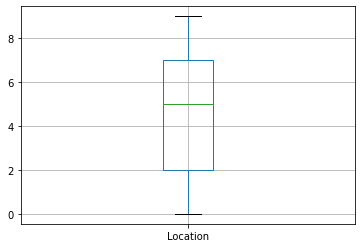

In [46]:
dataset.boxplot(column = ["Location"])

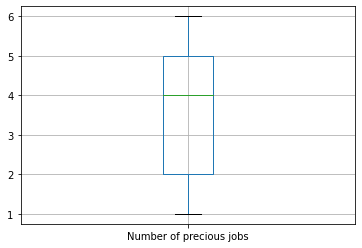

In [47]:
dataset.boxplot(column = ["Number of precious jobs"])

In [48]:
# Candidate relocation status ; this is the only column having the outlier
# present in the dataset.
# let's remove the outlier by using the following column.
# Let's define a function that will remove the outliers for getting threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [49]:
lowerStatus, higherStatus = remove_outlier(dataset["Candidate relocation status"])

In [50]:
# we will now remove the data points having the higher values than expected range.
dataset["Candidate relocation status"] = np.where(dataset["Candidate relocation status"] > higherStatus, higherStatus, dataset["Candidate relocation status"])

# we will now remove the data points having the lower values than expected range.
dataset["Candidate relocation status"] = np.where(dataset["Candidate relocation status"] < lowerStatus, lowerStatus, dataset["Candidate relocation status"])

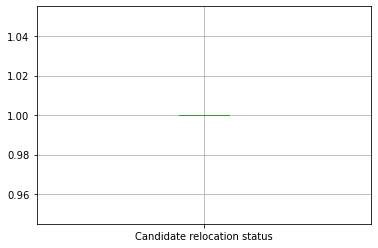

In [51]:
# let's again check the outlier for the Candidate relocation status.
dataset.boxplot(column = ["Candidate relocation status"])

In [52]:
pd.pivot_table(dataset, index=['LOB', 'Gender'], values='Notice period', aggfunc='count')

Notice period
LOB Gender               
0   0                  22
    1                  33
1   0                  55
    1                  65
2   0                  12
    1                  13

In [53]:
pd.pivot_table(dataset, index=['Offered band','Interview rounds'], values = 'LOB', aggfunc = 'count')

LOB
Offered band Interview rounds     
0            1                   2
             2                   6
             3                   8
             4                   2
1            1                   6
             2                   3
             3                   5
             4                   6
2            1                   9
             2                   6
             3                   6
             4                   8
3            1                   9
             2                  11
             3                   6
             4                   9
4            1                   2
             2                   7
             3                   8
             4                   8
5            1                   9
             2                   4
             3                   9
             4                   9
6            1                  16
             2                   8
             3                  12
             4                   6

#### Dummy variables

In [54]:
# Acceptance status
dataset['Acceptance status_binned'] = dataset['Acceptance status']
# 1: Offer Rejected 0: Joined

# Number of previous jobs
dataset['Number of precious jobs_binned']=pd.cut(x = dataset['Number of precious jobs'],
                        bins = [0,2,100], 
                        labels = [0, 1])
# 1: 3+  0: 0-2

# Interview rounds
dataset['Interview rounds_binned']=pd.cut(x = dataset['Interview rounds'],
                        bins = [0,1,100], 
                        labels = [0, 1])
# 1: 3+   0: 1-2 

# Total Experience
dataset['Total experience_binned']=pd.cut(x = dataset['Total experience'],
                        bins = [0,9,100], 
                        labels = [0, 1])
# 1: 10+ years  0: 0-9 years

# Relevant Experience (Variable is correlated with Total experience and can be dropped off)
dataset['Relevant experience_binned']=pd.cut(x = dataset['Relevant experience'],
                        bins = [0,8.5,100], 
                        labels = [0, 1])
# 1: 9+ years  0: 0-8.5 years

#Interview types
dataset['Interview types_binned'] = dataset['Interview types']
# 1: General 0: Others (Manegerial/Technical)

#Interview types2
dataset['Interview Types2_binned'] = dataset['Interview Types2']
# 1: Online 0: Others (FaceToFace/Written)

In [55]:
dataset

,Candidate ID,Written Test Date,Interview rounds,Date of first Interview,Date of last Interview,Interview types,Interview Types2,First interview duration,Last interaction duration,Date of Application,...,DOB,Location,Number of precious jobs,Acceptance status_binned,Number of precious jobs_binned,Interview rounds_binned,Total experience_binned,Relevant experience_binned,Interview types_binned,Interview Types2_binned
0,0,2020-05-29,4,2020-06-03,2020-06-12,0,1,40,25,2019-08-28,...,1991-11-06,5,2,0,0,1,0,0,0,1
1,111,2020-05-31,2,2020-06-05,2020-06-08,1,0,40,40,2019-11-28,...,1984-02-22,9,4,1,1,1,1,1,1,0
2,123,2020-05-15,3,2020-05-20,2020-05-26,2,1,45,60,2019-08-11,...,1995-03-27,1,1,0,0,1,0,0,2,1
3,134,2020-05-10,1,2020-05-15,2020-05-15,2,2,40,40,2019-08-18,...,1979-06-14,4,6,1,1,0,1,1,2,2
4,145,2020-01-11,4,2020-01-16,2020-01-25,2,1,15,25,2019-09-06,...,1982-11-26,4,5,0,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,107,2020-05-25,4,2020-05-30,2020-06-08,2,0,15,20,2019-12-06,...,1979-02-17,0,5,0,1,1,1,1,2,0
196,108,2020-06-13,3,2020-06-18,2020-06-24,0,2,60,60,2019-11-10,...,1982-05-27,5,5,1,1,1,1,1,0,2
197,109,2020-01-17,4,2020-01-22,2020-01-31,2,0,30,15,2019-11-19,...,1985-09-21,5,4,1,1,1,1,1,2,0
198,110,2020-04-18,4,2020-04-23,2020-05-02,1,0,25,25,2019-09-12,...,1986-06-02,5,4,0,1,1,1,1,1,0


In [56]:
# see, no outlier is present now.
# we have now cleaned our data.
# we have checked for the missing values , duplicate records,
# converted the categorical values into the numerical values, checked for the outliers
# removed the outliers present in our dataset.
# now, we will scale the data.
# let's move ahead with the scaling process.
scaler = StandardScaler()

In [57]:
column_names = dataset.columns

In [58]:
print(column_names)

Index(['Candidate ID', 'Written Test Date', 'Interview rounds',
       'Date of first Interview', 'Date of last Interview', 'Interview types',
       'Interview Types2', 'First interview duration',
       'Last interaction duration', 'Date of Application', 'Date of Interview',
       'Date of Job Offer', 'Date of Offer extension', 'Date of Joining',
       'Offered band', 'Offered Salary', 'Percentage hike offered (CTC)',
       'Joining bonus amount', 'LOB', 'Joining location',
       'Candidate relocation status', 'Acceptance status', 'Notice period',
       'Current CTC', 'Current gross salary', 'Current organization',
       'Highest Educational Degree', 'Total experience', 'Relevant experience',
       'Year of graduation', 'Expected CTC', 'Percentage hike (CTC) expected ',
       'Gender', 'Candidate source', 'DOB', 'Location',
       'Number of precious jobs', 'Acceptance status_binned',
       'Number of precious jobs_binned', 'Interview rounds_binned',
       'Total experience

In [59]:
column_names = ['Interview rounds', 'Offered Salary','Interview rounds_binned',
       'Joining bonus amount', 'Notice period','Interview types_binned',
       'Current CTC', 'Current gross salary', 'Current organization', 'Total experience_binned', 'Relevant experience_binned',
       'Year of graduation', 'Expected CTC', 'Percentage hike (CTC) expected ','Interview Types2_binned',
       'Number of precious jobs_binned', 'Acceptance status_binned']

In [60]:
df = pd.DataFrame(dataset, columns = column_names) 

In [61]:
dataset = pd.DataFrame(scaler.fit_transform(df), columns = column_names)

In [62]:
dataset.head()

,Interview rounds,Offered Salary,Interview rounds_binned,Joining bonus amount,Notice period,Interview types_binned,Current CTC,Current gross salary,Current organization,Total experience_binned,Relevant experience_binned,Year of graduation,Expected CTC,Percentage hike (CTC) expected,Interview Types2_binned,Number of precious jobs_binned,Acceptance status_binned
0,1.349790,-0.881339,0.600453,-0.799029,-1.422695,-1.379015,-0.799029,-0.799029,-0.017256,-1.408927,-1.408927,0.818525,-0.876041,-0.923779,-0.011869,-1.474654,-0.980196
1,-0.432111,0.576713,0.600453,0.429677,-1.422695,-0.136659,0.429677,0.429677,0.903090,0.709760,0.709760,-0.520184,0.566351,0.709568,-1.198734,0.678125,1.020204
2,0.458839,-1.469099,0.600453,-1.462968,-0.058000,1.105697,-1.462968,-1.462968,0.212830,-1.408927,-1.408927,1.583501,-1.469967,0.007752,-0.011869,-1.474654,-0.980196
3,-1.323061,1.586502,-1.665408,1.540294,1.306695,1.105697,1.540294,1.540294,0.442917,0.709760,0.709760,-1.476404,1.584509,0.036145,1.174997,0.678125,1.020204
4,1.349790,0.910229,0.600453,0.838461,-0.740347,1.105697,0.838461,0.838461,-0.477430,0.709760,0.709760,-0.902672,0.905737,0.218007,-0.011869,0.678125,-0.980196


# Part (D)	FEATURE ENGINEERING

In [63]:
# Now that all exploratory data analysis is complete, we will now proceed with feature selection

In [64]:
dataset.shape

(200, 17)

In [65]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,16]

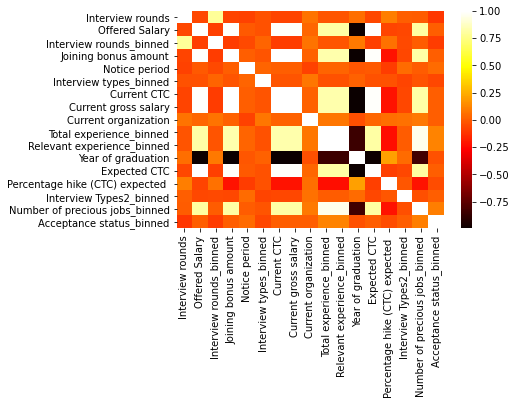

In [66]:
corrmat = dataset.corr() 
f, ax = plt.subplots() 
sns.heatmap(corrmat, ax = ax, cmap ="hot")

In [67]:
warnings.filterwarnings('ignore')

# Create the sbs object and select best 4 features
knn = KNeighborsClassifier(n_neighbors=4)

# the param forward when set to False will do sequential backward selection
sbs = SFS(knn,
           k_features=4,
           forward=False,
           scoring='accuracy')

sbs = sbs.fit(x, y)
print(sbs.k_feature_idx_)

(0, 1, 2, 3)


#  Part (E)	MODEL BUILDINGAND DIAGNOSTICS

In [68]:
# Now that feature selection is complete, we will now proceed with modeling and diagnostics (accuracy of model etc)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0) # split test and training data

logistic_regression= LogisticRegression()
logistic_regression.fit(xtrain,ytrain)
y_pred=logistic_regression.predict(xtest)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

ValueError: Unknown label type: 'continuous'